In [ ]:
# Here we just load the data from the cluster and plot it

In [2]:
import numpy as np
single = np.load('2nn_10_single.npz',allow_pickle=True)

single = single[single.files[0]]
x,y,d = single[0], single[1], single[2]

many12 = np.load('../Cluster/2nn_12_1000.npz')
many12 = many12[many12.files[0]]

many14 = np.load('../Cluster/2nn_14_1000.npz')
many14 = many14[many14.files[0]]


ws = [1.0, 1.89, 2.78, 3.67, 4.56, 5.56, 6.67]  # local
ws = [1.0, 1.55, 2.09, 2.64, 3.18, 3.73, 4.27, 4.82, 5.36, 5.91, 6.45, 7.0]  # Cluster
Ls = [12,14]


<ipython-input-4-e66a29e1c8fb>:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


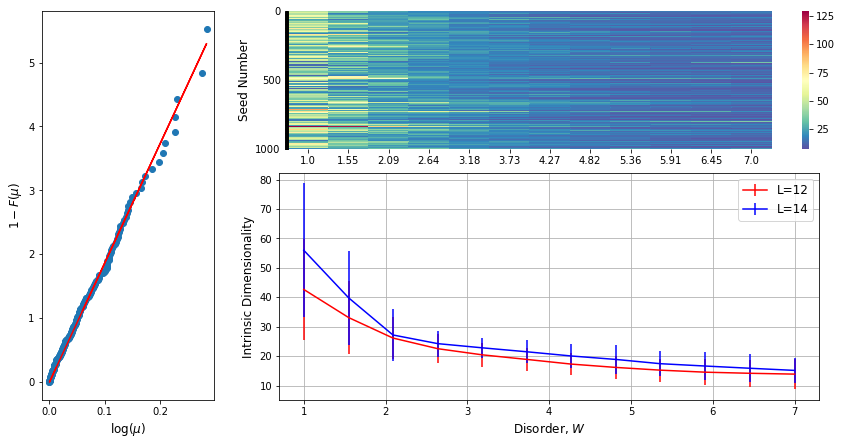

In [4]:
# Importing library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12,6))

ax0 = fig.add_axes([0.1, 0.1, 0.2, 0.9])
ax1 = fig.add_axes([0.385, .68, 0.7, 0.32])
ax2 = fig.add_axes([0.375, 0.1, 0.625, 0.525])

ax0.scatter(x,y)
ax0.plot(x,x*d, c='r')
ax0.set_xlabel('$\log{(\mu)}$', fontsize=12)
ax0.set_ylabel('$1-F(\mu)$', fontsize=12)
  

#ax1.imshow(many[0].T)

sns.heatmap(many12.T,
            xticklabels= ws,
            yticklabels= [0]+[' ']*499+[500]+[' ']*499+[1000],
           ax=ax1,square=False, cmap='Spectral_r')
#ax1.set_xlabel('Disorder, $W$', fontsize=12)
ax1.set_ylabel('Seed Number', fontsize=12)


mean12, std12 = np.mean(many12, axis=1), np.std(many12, axis=1)
mean14, std14 = np.mean(many14, axis=1), np.std(many14, axis=1)



ax2.errorbar(ws, mean12, yerr=std12, label = 'L=12', c='red')
ax2.errorbar(ws, mean14, yerr=std14, label = 'L=14', c='b')
#ax2.plot([1,7], [12]*2, ls='--', c='red')
#ax2.plot([1,7], [14]*2, ls='--', c='b')
#ax2.plot([1,7], [12**2/2]*2, ls='--', c='red')
#ax2.plot([1,7], [14**2/2]*2, ls='--', c='b')

ax2.set_xlabel('Disorder, $W$', fontsize=12)
ax2.set_ylabel('Intrinsic Dimensionality', fontsize=12)
#ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.grid()
ax2.legend(fontsize=12)

plt.savefig('figures/2nn_MBL_all.png', dpi=500, bbox_inches='tight')
fig.show()

